# Section 24: DBSCAN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## DBSCAN versus K-Means Clustering

In [2]:
df_blobs = pd.read_csv('cluster_blobs.csv')

In [3]:
df_blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot: xlabel='X1', ylabel='X2'>

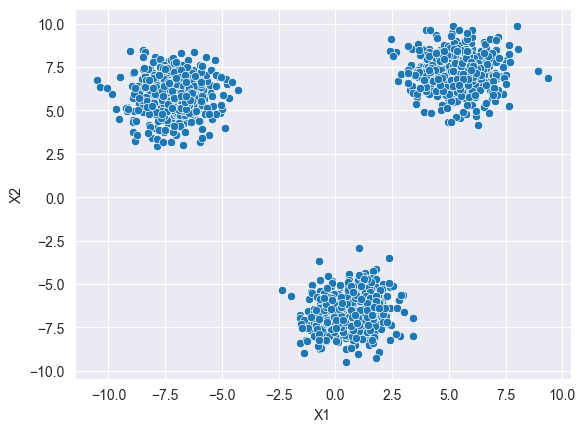

In [4]:
sns.scatterplot(df_blobs, x='X1', y='X2')

In [5]:
df_moons = pd.read_csv('cluster_moons.csv')

In [6]:
df_moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot: xlabel='X1', ylabel='X2'>

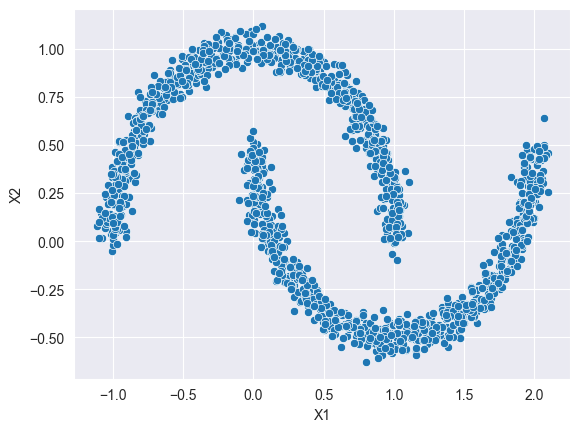

In [7]:
sns.scatterplot(df_moons, x='X1', y='X2')

In [8]:
df_circles = pd.read_csv('cluster_circles.csv')

In [9]:
df_circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot: xlabel='X1', ylabel='X2'>

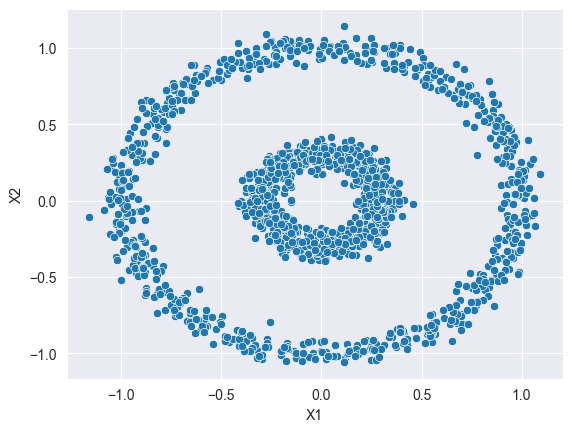

In [10]:
sns.scatterplot(df_circles, x='X1', y='X2')

In [11]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    
    sns.scatterplot(data, x='X1', y='X2', hue=labels, palette='Set1')

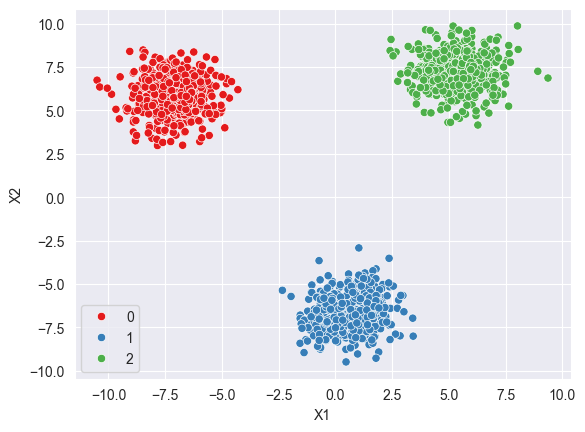

In [12]:
kmeans_model = KMeans(n_clusters=3)

display_categories(kmeans_model, df_blobs)

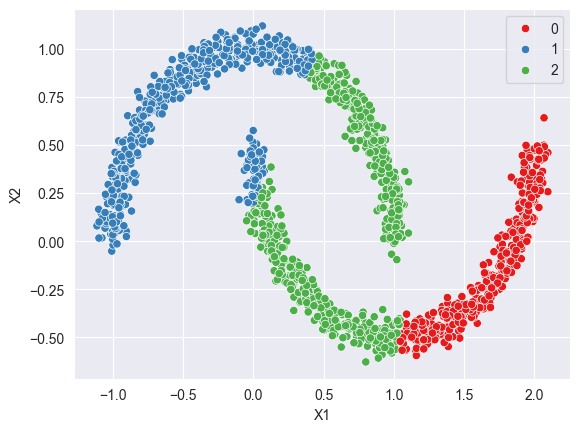

In [13]:
display_categories(kmeans_model, df_moons)

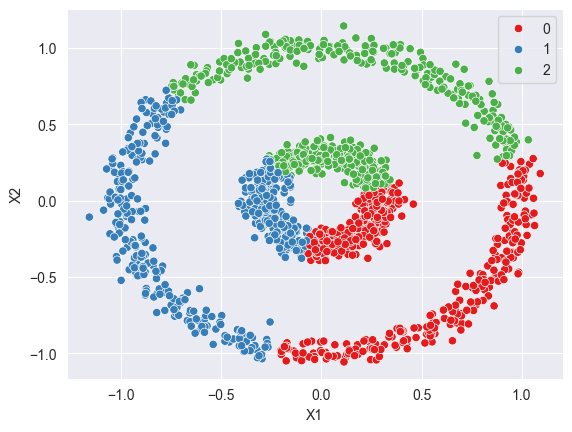

In [14]:
display_categories(kmeans_model, df_circles)

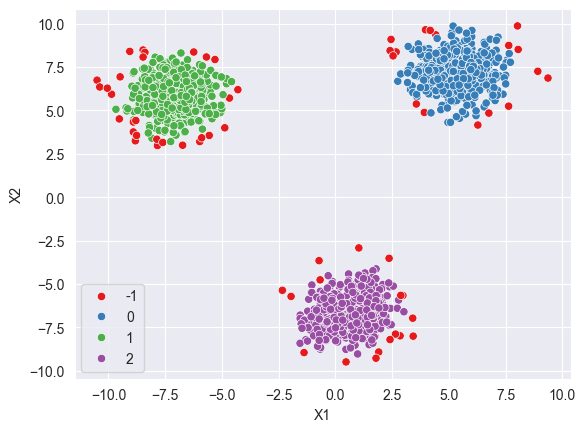

In [15]:
dbscan_model = DBSCAN()

display_categories(dbscan_model, df_blobs)

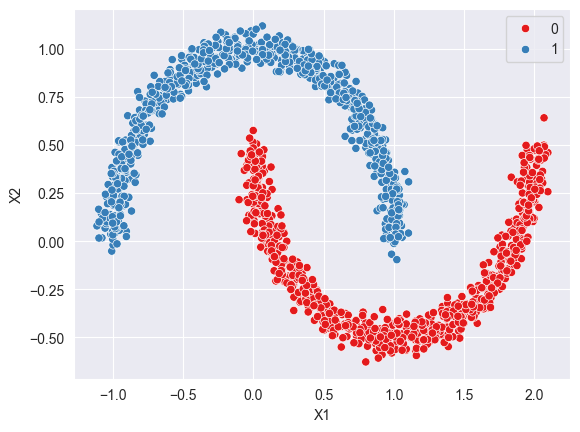

In [16]:
dbscan_model = DBSCAN(eps=0.15)

display_categories(dbscan_model, df_moons)

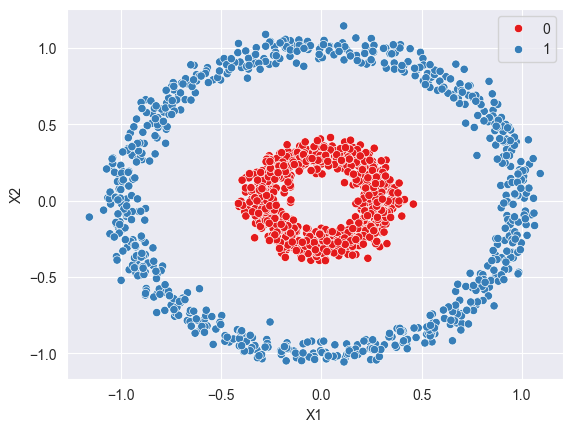

In [17]:
display_categories(dbscan_model, df_circles)

## Hyperparameter Tuning Methods

In [18]:
df_two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [19]:
df_two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<AxesSubplot: xlabel='X1', ylabel='X2'>

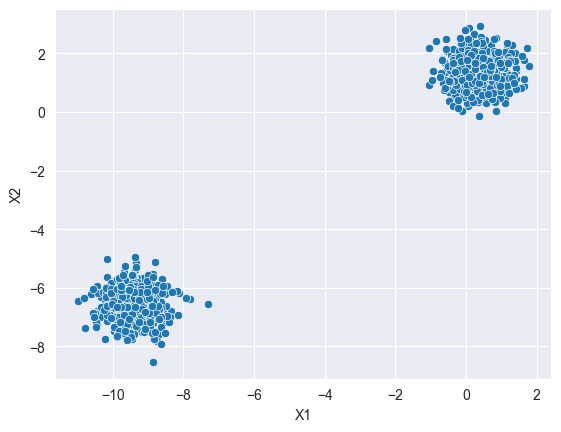

In [20]:
sns.scatterplot(df_two_blobs, x='X1', y='X2')

<AxesSubplot: xlabel='X1', ylabel='X2'>

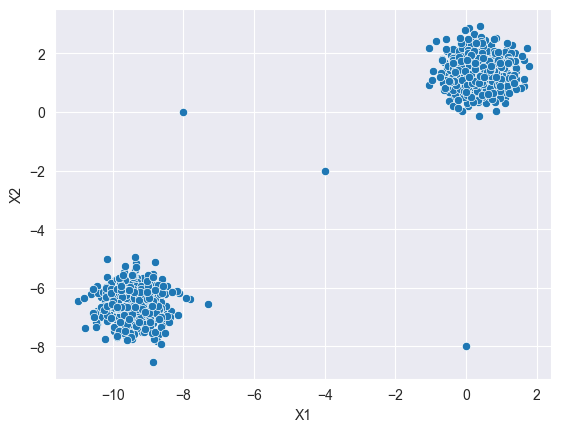

In [21]:
sns.scatterplot(df_two_blobs_outliers, x='X1', y='X2')

In [22]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    
    sns.scatterplot(data, x='X1', y='X2', hue=labels, palette='Set1')

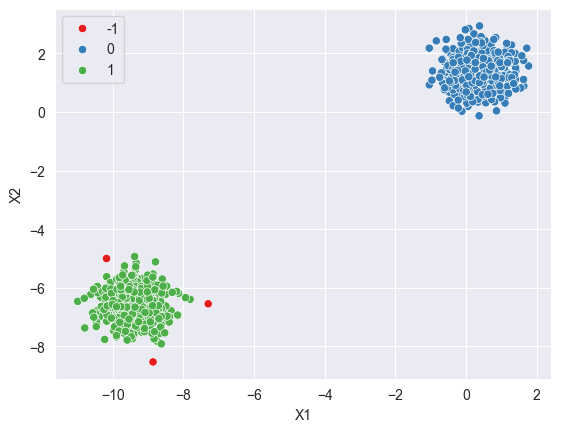

In [23]:
dbscan_model = DBSCAN()

display_categories(dbscan_model, df_two_blobs)

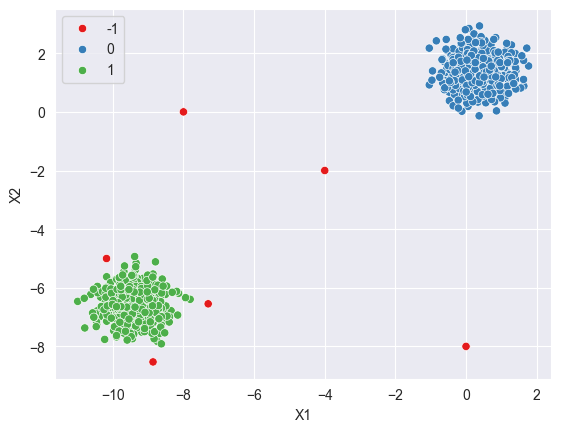

In [24]:
display_categories(dbscan_model, df_two_blobs_outliers)

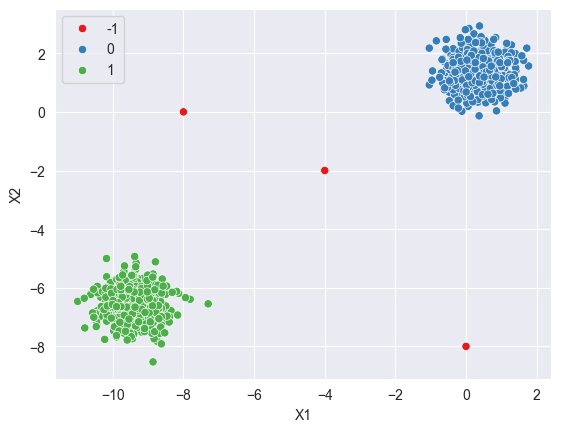

In [25]:
dbscan_model = DBSCAN(eps=1)

display_categories(dbscan_model, df_two_blobs_outliers)

In [26]:
np.sum(dbscan_model.labels_ == -1)

3

In [27]:
number_of_outliers = []
outliers_percent = []
eps_range = np.linspace(0.001, 1, 200)

for eps in eps_range:
    dbscan = DBSCAN(eps=eps)
    
    dbscan.fit(df_two_blobs_outliers)
    
    nr_of_outliers = np.sum(dbscan.labels_ == -1)
    
    number_of_outliers.append(nr_of_outliers)
    outliers_percent.append(100 * nr_of_outliers / len(dbscan.labels_))

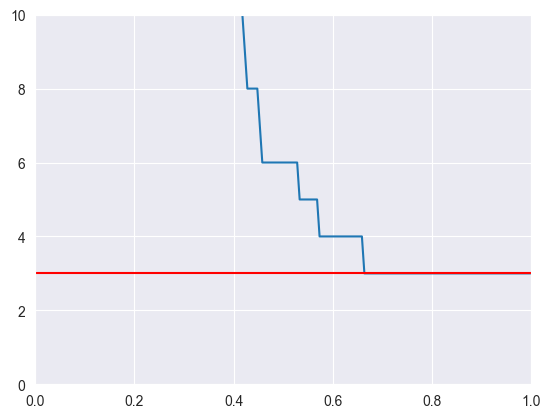

In [28]:
sns.lineplot(x=eps_range, y=number_of_outliers)

plt.xlim(0, 1)
plt.ylim(0, 10)
plt.hlines(y=3, xmin=0, xmax=2, color='red')

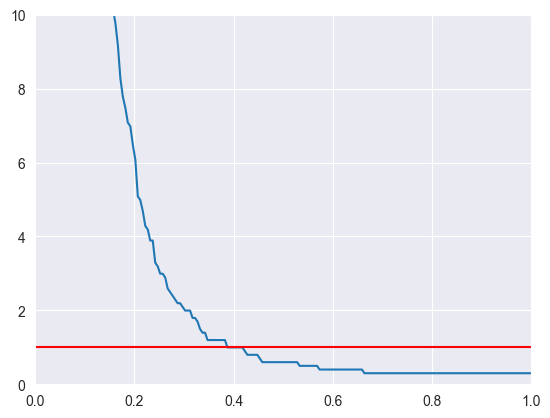

In [29]:
sns.lineplot(x=eps_range, y=outliers_percent)

plt.xlim(0, 1)
plt.ylim(0, 10)
plt.hlines(y=1, xmin=0, xmax=2, color='red')

In [30]:
number_of_outliers = []
outliers_percent = []
min_samples_range = np.arange(1, 100) 

for min_samples in min_samples_range:
    dbscan = DBSCAN(min_samples=min_samples)
    
    dbscan.fit(df_two_blobs_outliers)
    
    nr_of_outliers = np.sum(dbscan.labels_ == -1)
    
    number_of_outliers.append(nr_of_outliers)
    outliers_percent.append(100 * nr_of_outliers / len(dbscan.labels_))

<AxesSubplot: >

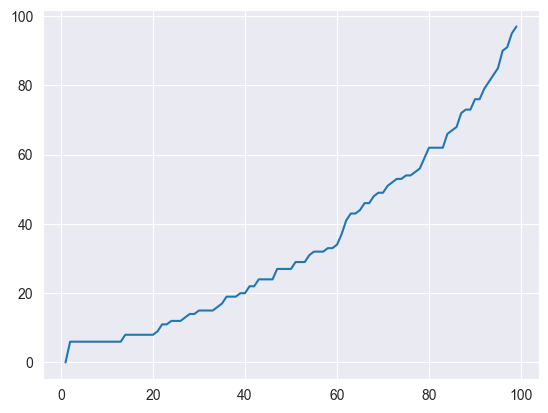

In [31]:
sns.lineplot(x=min_samples_range, y=number_of_outliers)

<AxesSubplot: >

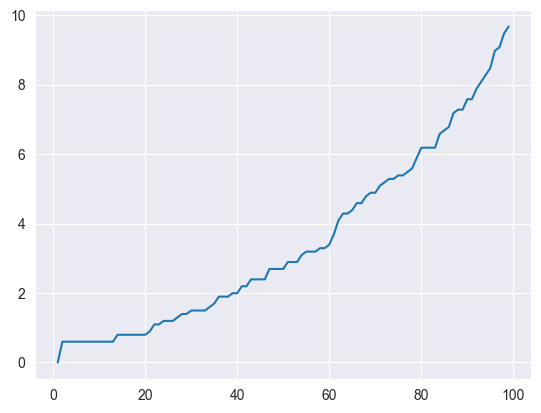

In [32]:
sns.lineplot(x=min_samples_range, y=outliers_percent)

## Exercises

In [33]:
df = pd.read_csv('wholesome_customers_data.csv')

In [34]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<AxesSubplot: xlabel='Milk', ylabel='Grocery'>

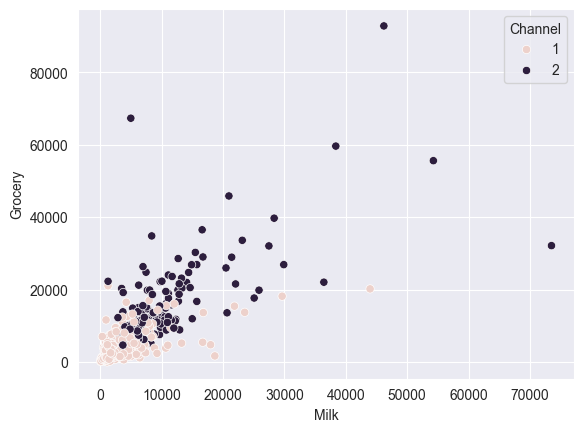

In [36]:
sns.scatterplot(df, x='Milk', y='Grocery', hue='Channel')

<AxesSubplot: xlabel='Milk', ylabel='Count'>

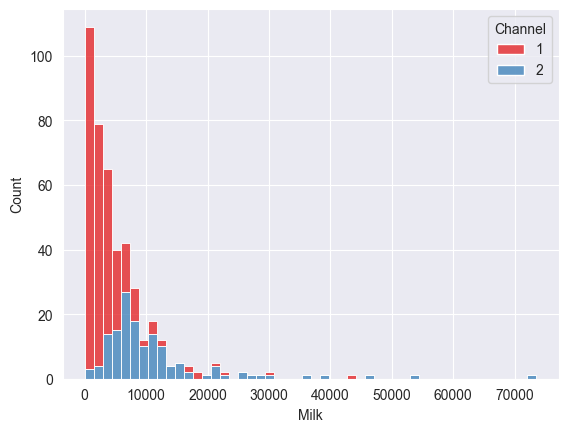

In [37]:
sns.histplot(df, x='Milk', hue='Channel', palette='Set1', multiple='stack')

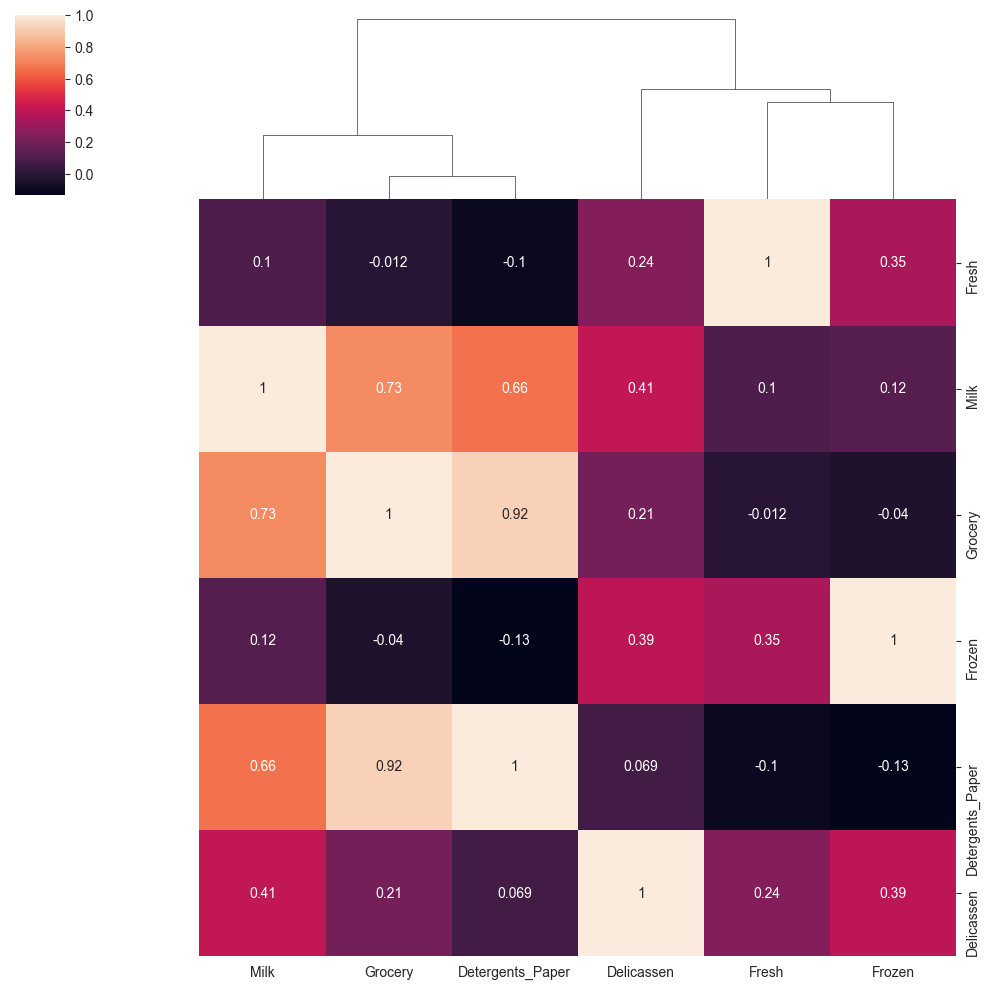

In [38]:
sns.clustermap(df.drop(['Region', 'Channel'], axis=1).corr(), annot=True, row_cluster=False)

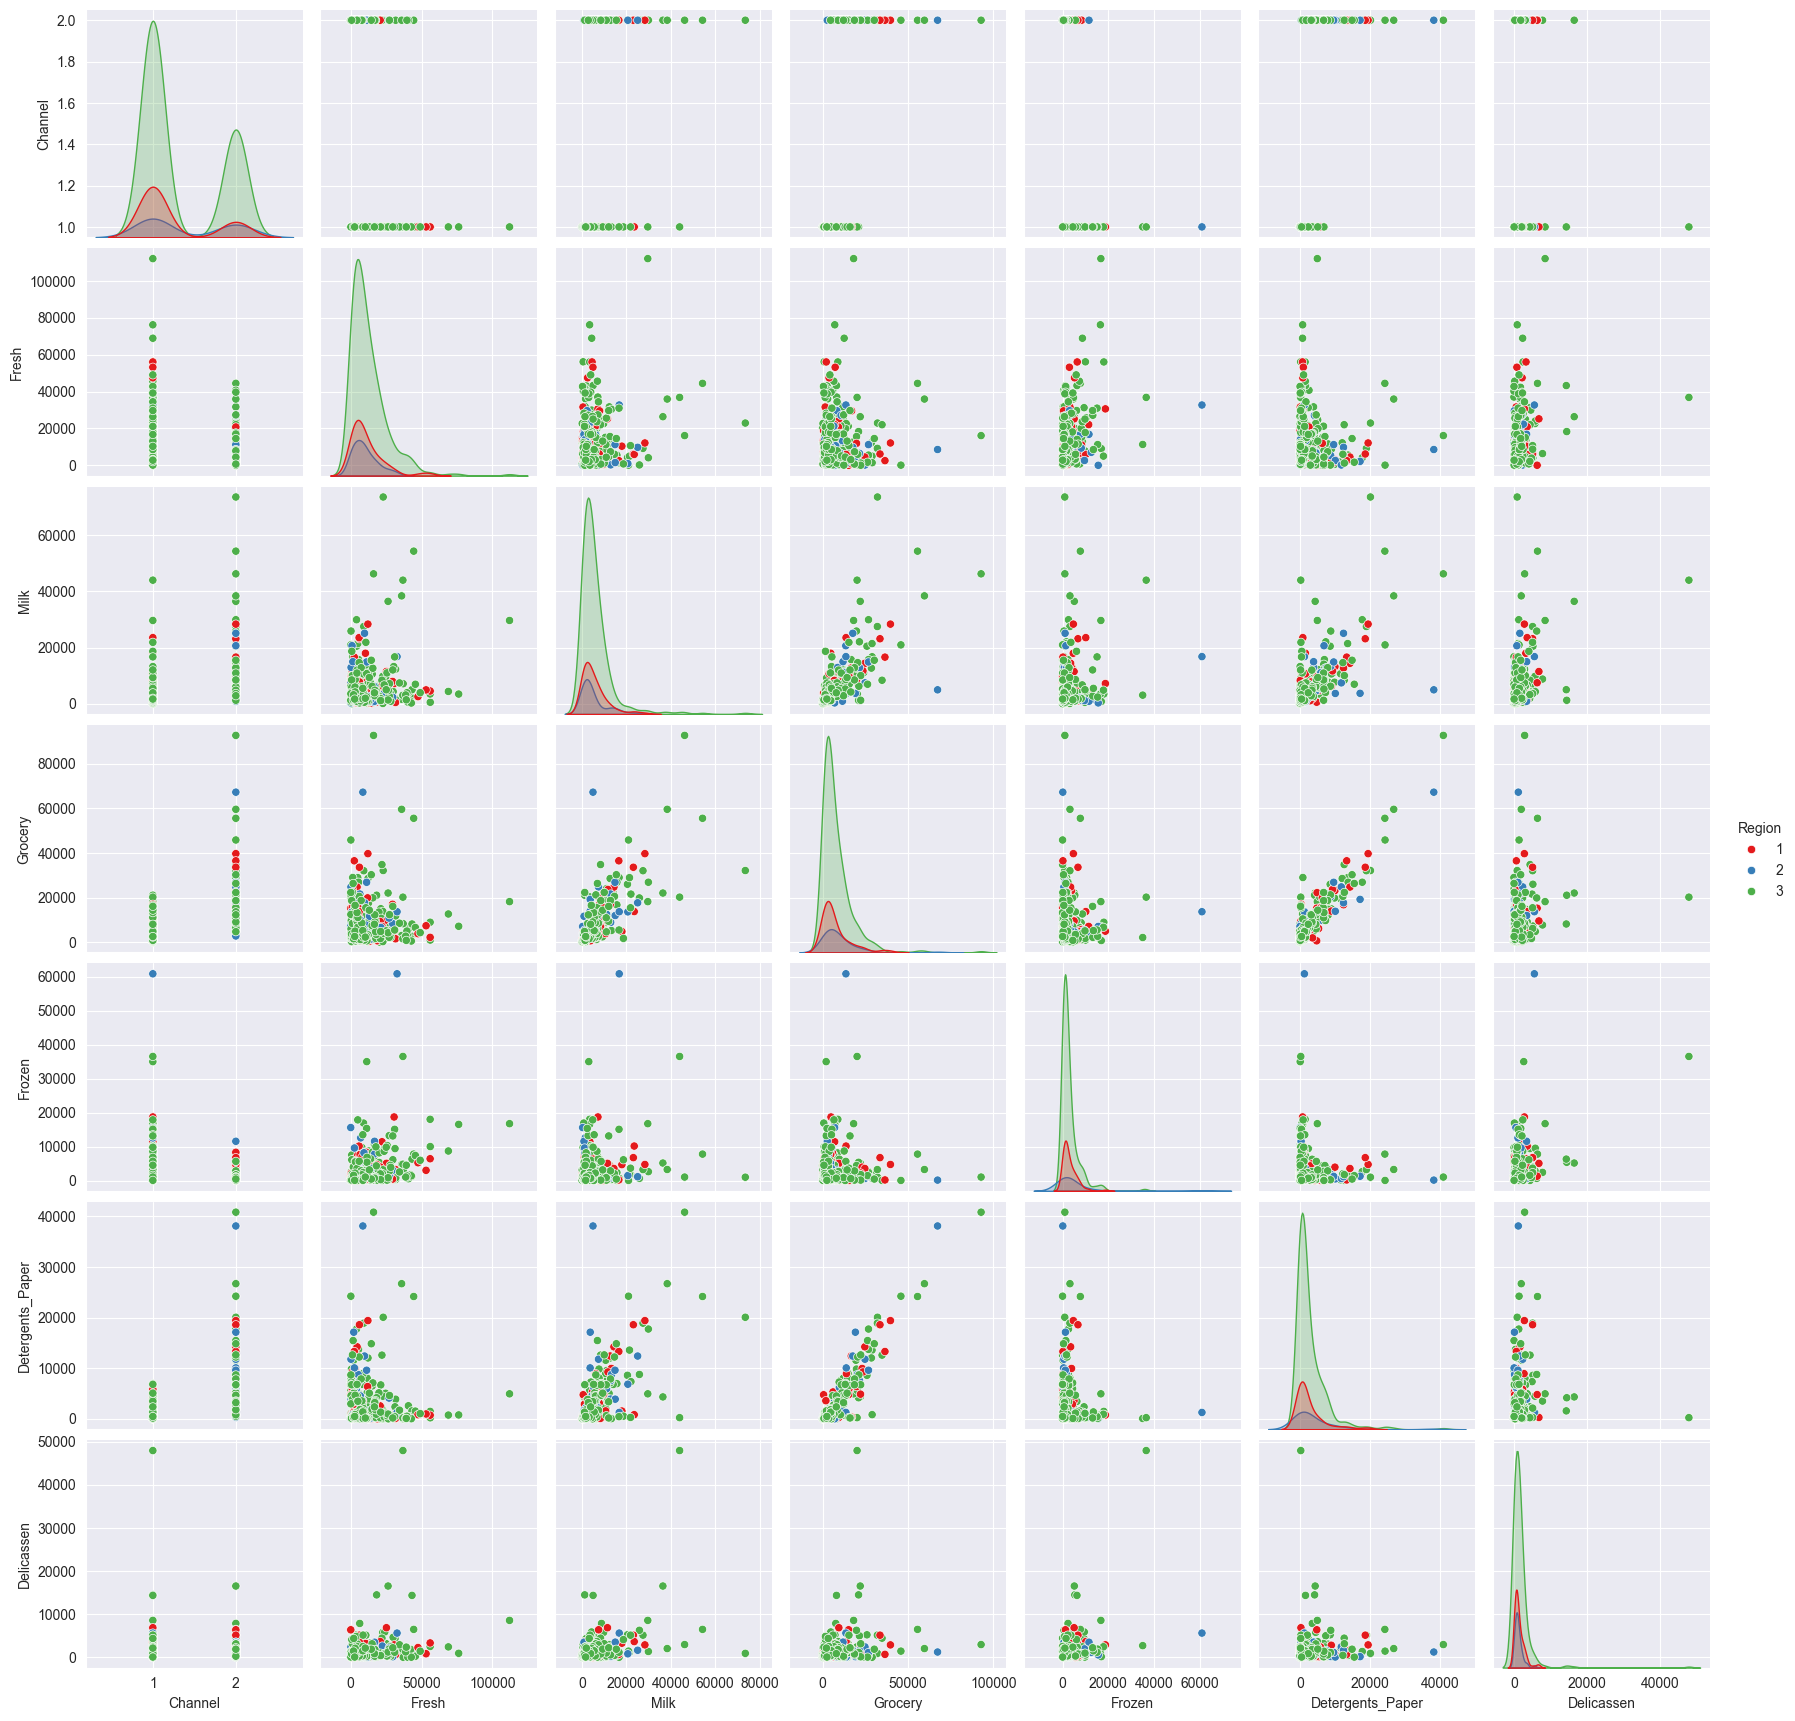

In [39]:
sns.pairplot(df, hue='Region', palette='Set1')

In [40]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df)

In [41]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [42]:
number_of_instances = len(scaled_X)
number_of_features = len(scaled_X[0])
eps_range = np.linspace(0.001, 3, 50)
min_samples = number_of_features * 2
outliers_percent = []

for eps in eps_range:
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    
    dbscan_model.fit(scaled_X)
    
    number_of_outliers = np.sum(dbscan_model.labels_ == -1)

    outliers_percent.append(100 * number_of_outliers / number_of_instances)

<AxesSubplot: >

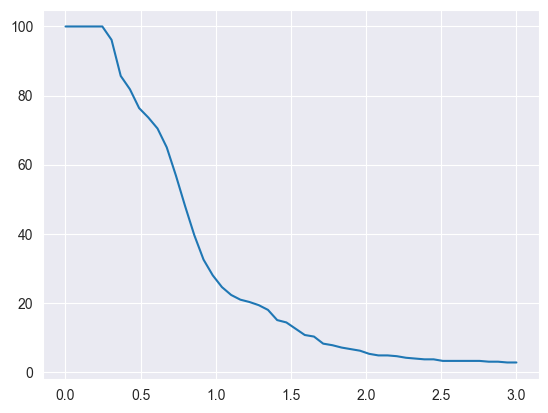

In [43]:
sns.lineplot(x=eps_range, y=outliers_percent)

In [44]:
dbscan_model = DBSCAN(eps=2, min_samples=min_samples)

dbscan_model.fit(scaled_X)

DBSCAN(eps=2, min_samples=16)

<AxesSubplot: xlabel='Grocery', ylabel='Milk'>

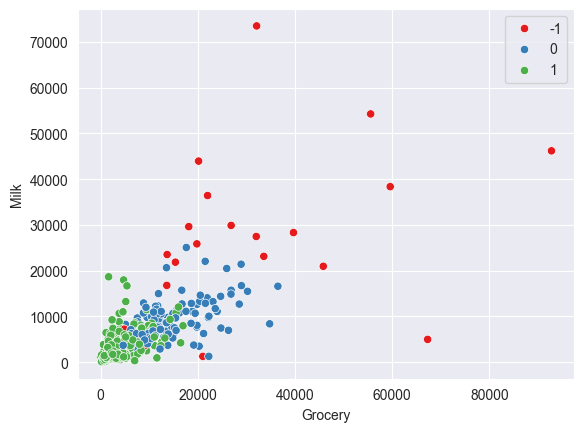

In [45]:
sns.scatterplot(df, x='Grocery', y='Milk', hue=dbscan_model.labels_, palette='Set1')

<AxesSubplot: xlabel='Detergents_Paper', ylabel='Milk'>

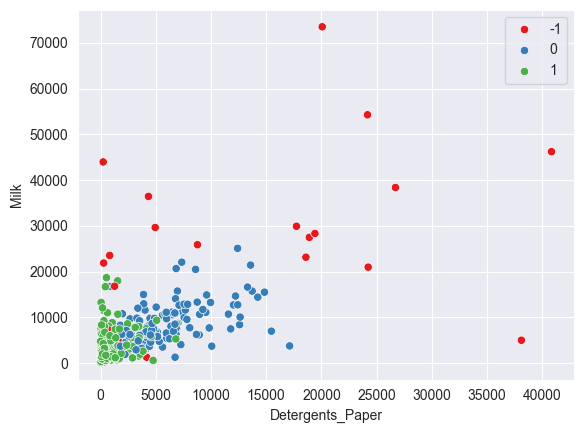

In [46]:
sns.scatterplot(df, x='Detergents_Paper', y='Milk', hue=dbscan_model.labels_, palette='Set1')

In [47]:
df['Labels'] = dbscan_model.labels_

In [48]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [49]:
spending_means = df.drop(['Channel', 'Region'], axis=1).groupby('Labels').mean()
spending_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


In [50]:
min_max_scaler = MinMaxScaler()

scaled_sm = min_max_scaler.fit_transform(spending_means)

In [51]:
df_scaled_sm = pd.DataFrame(scaled_sm, spending_means.index, spending_means.columns)

<AxesSubplot: ylabel='Labels'>

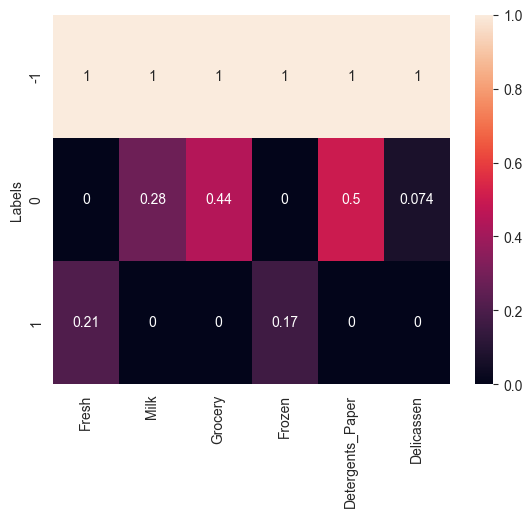

In [52]:
sns.heatmap(df_scaled_sm, annot=True)

<AxesSubplot: ylabel='Labels'>

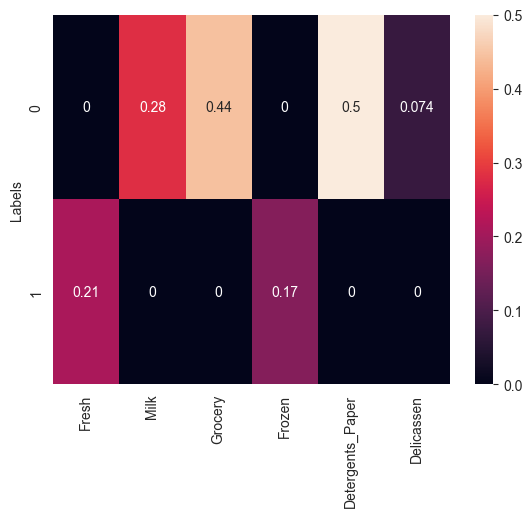

In [53]:
sns.heatmap(df_scaled_sm.drop(-1), annot=True)